In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [52]:
data=pd.read_csv('insurance.csv')

In [53]:
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [54]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [55]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [56]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [57]:
df = data.drop(columns = ['region','sex','smoker'])

In [58]:
df

,age,bmi,children,charges
0,19,27.900,0,16884.92400
1,18,33.770,1,1725.55230
2,28,33.000,3,4449.46200
3,33,22.705,0,21984.47061
4,32,28.880,0,3866.85520
...,...,...,...,...
1333,50,30.970,3,10600.54830
1334,18,31.920,0,2205.98080
1335,18,36.850,0,1629.83350
1336,21,25.800,0,2007.94500


In [59]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
df = sc.fit_transform(df)
df

array([[-1.43876426, -0.45332   , -0.90861367,  0.2985838 ],
       [-1.50996545,  0.5096211 , -0.07876719, -0.95368917],
       [-0.79795355,  0.38330685,  1.58092576, -0.72867467],
       ...,
       [-1.50996545,  1.0148781 , -0.90861367, -0.96159623],
       [-1.29636188, -0.79781341, -0.90861367, -0.93036151],
       [ 1.55168573, -0.26138796, -0.90861367,  1.31105347]])

In [60]:
X_train = df[:1070,:3]
X_train = np.c_[np.ones(len(X_train),dtype='int64'),X_train]

y_train = df[:1070,-1]


X_test = df[1070:,:3]
X_test = np.c_[np.ones(len(X_test),dtype='int64'),X_test]

y_test = df[1070:,-1]

In [61]:
X_train

array([[ 1.        , -1.43876426, -0.45332   , -0.90861367],
       [ 1.        , -1.50996545,  0.5096211 , -0.07876719],
       [ 1.        , -0.79795355,  0.38330685,  1.58092576],
       ...,
       [ 1.        , -0.01474046,  1.9671563 , -0.90861367],
       [ 1.        ,  1.69408811, -1.47695756, -0.07876719],
       [ 1.        ,  1.0532774 ,  0.20285792, -0.07876719]])

In [62]:
y_train

array([ 0.2985838 , -0.95368917, -0.72867467, ..., -0.62062849,
        0.08916885, -0.19343077])

In [63]:
pred = lambda x,theta: x.dot(theta)

def standardize(x,x_v):
    n = x-x_v.mean()
    return(n/x_v.std())

def ols(x,y):

    y_ = y.mean()
    x_ = x.mean()

    b1 = np.sum((y-y_)*(x-x_))/np.sum((x-x_)**2)
    b0 = y_- b1*x_
    return(b0,b1)

def cost_function(X, Y, B):
    m = len(Y)
    J = np.sum((X.dot(B) - Y) ** 2)/(2 * m)
    return J


def r2(y_,y):
    sst = np.sum((y-y.mean())**2)
    ssr = np.sum((y_-y)**2)

    r2 = 1-(ssr/sst)
    return(r2)

In [64]:
def batch_gradient_descent(X, Y, B, alpha, iterations):
    cost_history = [0] * iterations
    m = len(Y)
    
    for iteration in range(iterations):
        h = X.dot(B)
        loss = h - Y
        gradient = X.T.dot(loss) / m
        B = B - alpha * gradient
        cost = cost_function(X, Y, B)
        cost_history[iteration] = cost
        
    return B, cost_history

In [65]:
B = np.zeros(X_train.shape[1])
alpha = 0.005
iter_ = 2000

newB, cost_history = batch_gradient_descent(X_train, y_train, B, alpha, iter_)

In [66]:
newB

array([-0.01419709,  0.29368297,  0.15792722,  0.04691617])

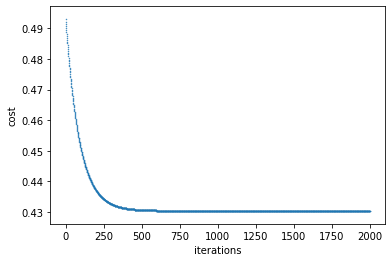

In [67]:
plt.xlabel('iterations')
plt.ylabel('cost')

plt.scatter(np.arange(iter_),cost_history,s=0.2)

In [68]:
y_ = pred(X_test,newB)

r2(y_,y_test)

0.08724199689204859